In [1]:
# Support Vector Machines

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [3]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [4]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 0)

In [5]:
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [7]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [8]:
# Making the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm
# you can also ravel it and extract the analytics separately
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()


# Model evaluation
from sklearn.metrics import confusion_matrix

# Get true negatives, false positives, false negatives, true positives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

# Get the accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# Get the precision score
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)

# Get the recall score
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)

# Get the F-1 score
from sklearn.metrics import f1_score
f1_score = f1_score(y_test, y_pred)

print('True negatives: {tn}, False positives: {fp}, False negatives: {fn}, True Positives: {tp}'.format(tn=tn, fp=fp, fn=fn, tp=tp))
print('Accuracy: {0}, Precision: {1}, Recall: {2}, F-1 Score: {3}'.format(accuracy, precision, recall, f1_score))

True negatives: 64, False positives: 4, False negatives: 3, True Positives: 29
Accuracy: 0.93, Precision: 0.878787878788, Recall: 0.90625, F-1 Score: 0.892307692308


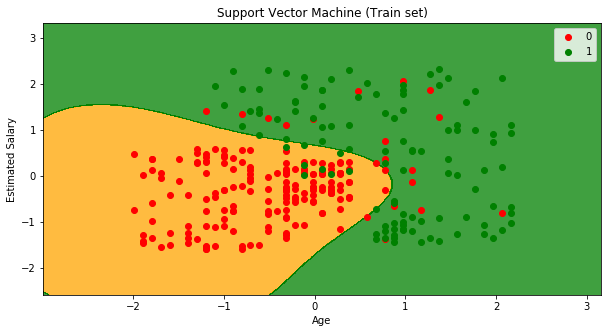

In [9]:
# Visualising the test set results
from matplotlib.colors import ListedColormap
# X_set, y_set = X_test, y_test
X_set, y_set = X_train, y_train
plt.rcParams['figure.figsize'] = [10, 5]
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

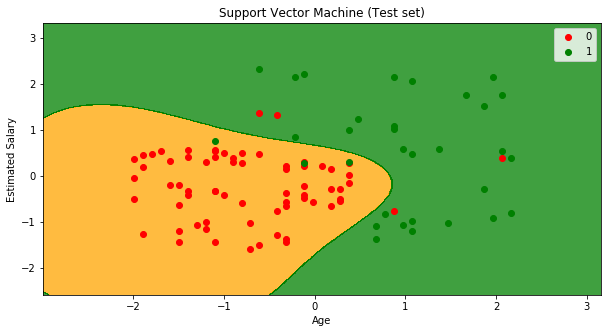

In [10]:
# Visualising the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
# X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()